In [1]:
import os,sys,json
import core.nsf_utils, core.openaire_utils

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [2]:
def plot_pub_vs_pis(t_type, data, size):
    plt.figure(figsize=(10,6))
    plt.title("[{} {}-{}] Number of publications by number of PIs".format(t_type, years[0], years[-1]))
    plt.ylabel("Number of publications")
    plt.xlabel("Number of PIs (team leaders)")
    x = [d["num_pis"] for d in data.values()]
    y = [d["num_pubs"] for d in data.values()]
    if size == "amount":
        s = [np.sqrt(d["amount"])/5 for d in data.values()]
    if size == "teamsize":
        s = [np.mean(d["team_size"]) for d in data.values()]
    plt.scatter(x, y, s=s, alpha=0.5)
    print("\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
    # plt.legend(div_type, bbox_to_anchor=(1, 1))

def plot_pub_vs_ncc(t_type, data, size):
    plt.figure(figsize=(10,6))
    plt.title("[{} {}-{}] Number of publications by number of teams".format(t_type, years[0], years[-1]))
    plt.ylabel("Number of publications")
    plt.xlabel("Number of teams (coauthor connected components)")
    x = [d["num_cc"] for d in data.values()]
    y = [d["num_pubs"] for d in data.values()]
    if size == "amount":
        s = [np.sqrt(d["amount"])/5 for d in data.values()]
    if size == "teamsize":
        s = [np.mean(d["team_size"]) for d in data.values()]
    plt.scatter(x, y, s=s, alpha=0.5)
    plt.plot(x, x,"--") # y=x plot
    print("\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
    # plt.legend(div_type, bbox_to_anchor=(1, 1))

In [11]:
years = [2000, 2001, 2003, 2005, 2007, 2009, 2010, 2011, 2012, 2013, 2015]
data = {}
for y in years:
    data.update(core.nsf_utils.team_analysis(y))


			num_pub mean=4.25, std=13.12, median=0.00


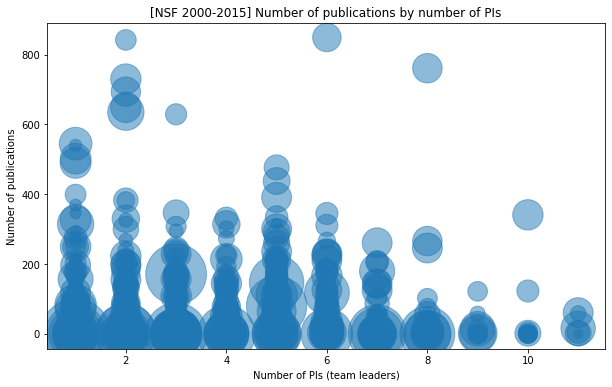

In [12]:
plot_pub_vs_pis("NSF", data, "amount")


			num_pub mean=4.25, std=13.12, median=0.00


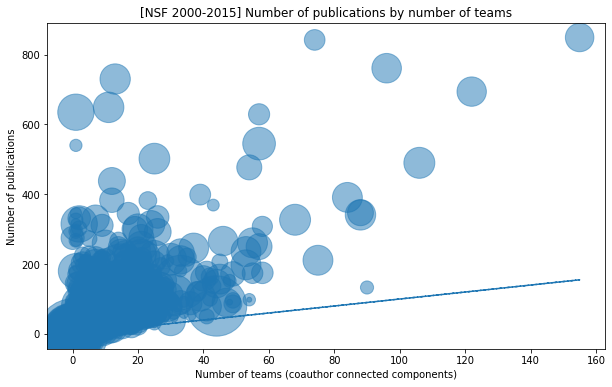

In [13]:
plot_pub_vs_ncc("NSF", data, "amount")


			num_pub mean=4.25, std=13.12, median=0.00


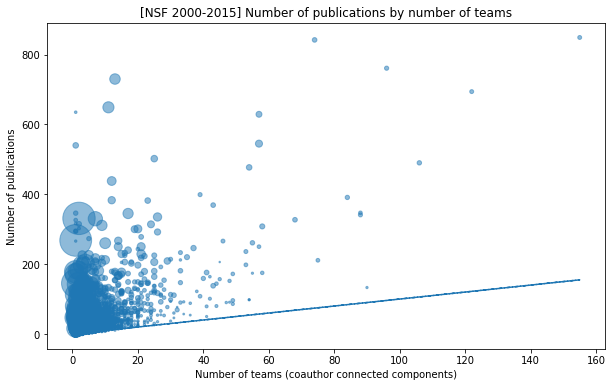

In [14]:
plot_pub_vs_ncc("NSF", data, "teamsize")


			num_pub mean=6.11, std=14.37, median=0.00


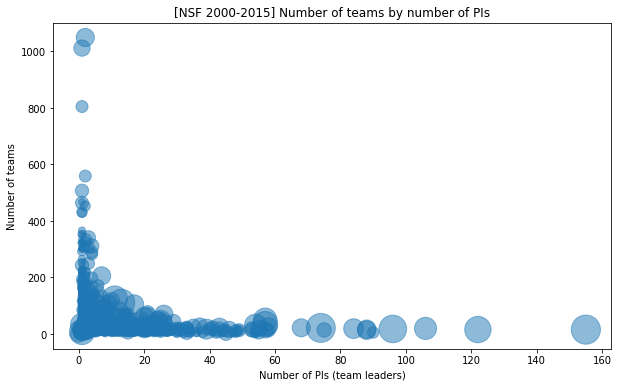

In [24]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Number of teams by number of PIs".format("NSF", years[0], years[-1]))
plt.ylabel("Number of teams")
plt.xlabel("Number of PIs (team leaders)")
x = [d["num_pis"] for d in data.values()]
x = [d["num_cc"] for d in data.values()]
# s = [np.sqrt(d["amount"])/5 for d in data.values()]
s = [d["num_pubs"] for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(div_type, bbox_to_anchor=(1, 1))


			num_pub mean=6.11, std=14.37, median=0.00


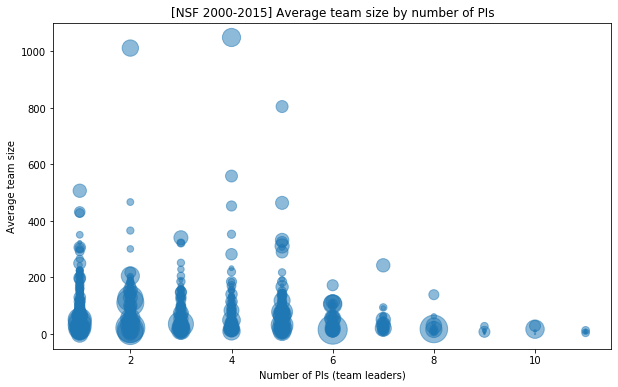

In [23]:
plt.figure(figsize=(10,6))
plt.title("[{} {}-{}] Average team size by number of PIs".format("NSF", years[0], years[-1]))
plt.ylabel("Average team size")
plt.xlabel("Number of PIs (team leaders)")
x = [d["num_pis"] for d in data.values()]
y = [np.mean(d["team_size"]) for d in data.values()]
# s = [np.sqrt(d["amount"])/5 for d in data.values()]
s = [d["num_pubs"] for d in data.values()]
plt.scatter(x, y, s=s, alpha=0.5)
print("\n\t\t\tnum_pub mean={:3.2f}, std={:3.2f}, median={:3.2f}".format(np.mean(y), np.std(y), np.median(y)))
# plt.legend(div_type, bbox_to_anchor=(1, 1))

In [7]:
years = range(2009, 2019)
data = {}
for y in years:
    data.update(core.openaire_utils.team_analysis(y))


			num_pub mean=1.18, std=2.35, median=0.00


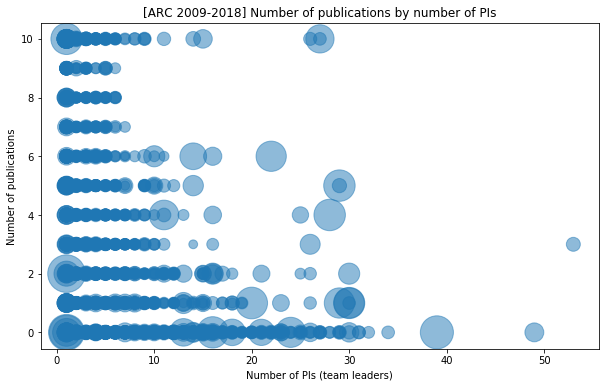

In [8]:
plot_pub_vs_pis("ARC", data, "amount")


			num_pub mean=1.18, std=2.35, median=0.00


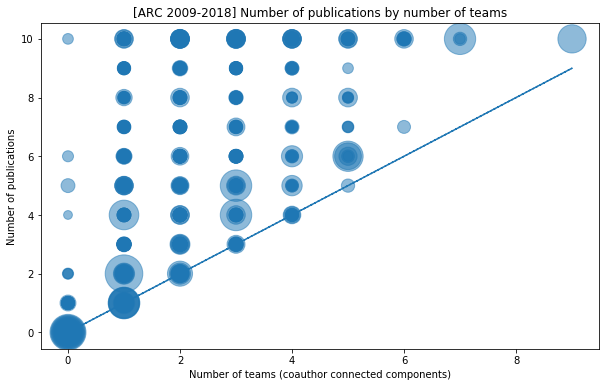

In [9]:
plot_pub_vs_ncc("ARC", data, "amount")


			num_pub mean=1.18, std=2.35, median=0.00


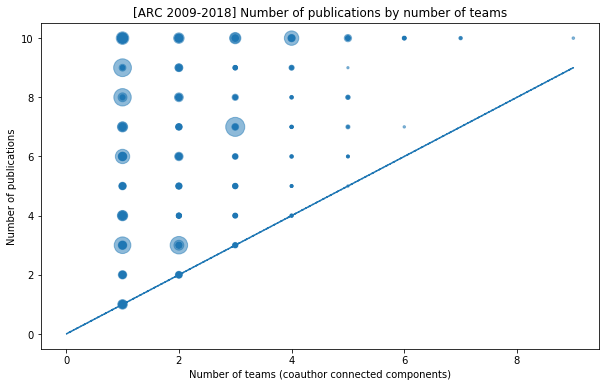

In [10]:
plot_pub_vs_ncc("ARC", data, "teamsize")